# 🚀 Neural Network ด้วย sklearn ใน 3 บรรทัด!

**จุดประสงค์**: เรียนรู้วิธีสร้าง Neural Network แบบง่ายๆ ด้วย **scikit-learn**

**โค้ดต้นฉบับ**: `machine_learning_examples-master/ann_class/sklearn_ann.py`

---

## 🎯 sklearn vs Manual Implementation

| | Manual (backprop.ipynb) | sklearn (นี่!) |
|---|---|---|
| **โค้ด** | ~200+ บรรทัด | **3 บรรทัด!** ✨ |
| **Gradient** | เขียนเอง | sklearn ทำให้ |
| **Weights** | ต้อง initialize เอง | Auto |
| **Training Loop** | ต้องเขียนเอง | `.fit()` |
| **Prediction** | ต้องเขียน forward() | `.predict()` |
| **ใช้เมื่อไหร่?** | เรียนรู้หลักการ | งานจริง (Production) |

💡 **sklearn MLPClassifier** = Multi-Layer Perceptron Classifier (ANN)

---

## 📊 ข้อมูล: E-commerce Customer Behavior

**Dataset**: `ecommerce_data.csv`

**Features** (input):
- Time on site (เวลาที่ใช้บนเว็บ)
- Time on page (เวลาที่อ่าน)
- Number of products viewed
- User action (categorical: 0-3)

**Target** (output):
- Did customer buy? (0 = No, 1/2/3 = different purchase types)

**Task**: ทำนายพฤติกรรมลูกค้าจาก browsing data

## 📦 Step 1: Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
import sys
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าฟอนต์ไทย
font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# เพิ่ม path
sys.path.append('../../machine_learning_examples-master')

print("✅ พร้อมเรียนรู้ sklearn Neural Network!")

✅ พร้อมเรียนรู้ sklearn Neural Network!


## 📥 Step 2: โหลดข้อมูล

**แนวคิด**: ใช้ฟังก์ชัน `get_data()` จาก `process.py`

**ฟังก์ชันนี้ทำอะไร?**
1. โหลด `ecommerce_data.csv`
2. **One-Hot Encode** categorical features
3. **Normalize** numerical features (mean=0, std=1)
4. **Split** train/test (last 100 samples = test)

In [2]:
# Import function
sys.path.append('../../machine_learning_examples-master/ann_logistic_extra')
from process import get_data

# โหลดข้อมูล
Xtrain, Ytrain, Xtest, Ytest = get_data()

print("✅ โหลดข้อมูลเรียบร้อย!")
print(f"")
print(f"📌 Training Set:")
print(f"   Xtrain shape: {Xtrain.shape}")
print(f"   Ytrain shape: {Ytrain.shape}")
print(f"")
print(f"📌 Test Set:")
print(f"   Xtest shape: {Xtest.shape}")
print(f"   Ytest shape: {Ytest.shape}")
print(f"")
print(f"💡 จำนวน features: {Xtrain.shape[1]}")
print(f"   (original + one-hot encoded)")

✅ โหลดข้อมูลเรียบร้อย!

📌 Training Set:
   Xtrain shape: (400, 8)
   Ytrain shape: (400,)

📌 Test Set:
   Xtest shape: (100, 8)
   Ytest shape: (100,)

💡 จำนวน features: 8
   (original + one-hot encoded)


In [3]:
# ดูข้อมูลตัวอย่าง
print("📊 ตัวอย่างข้อมูล (5 แถวแรก):")
print(f"")
print(f"Features (X):")
for i in range(5):
    print(f"   Sample {i}: {Xtrain[i][:4]}... (แสดง 4 features แรก)")

print(f"")
print(f"Target (Y):")
print(f"   {Ytrain[:10]}")

# นับจำนวน class
unique_classes = np.unique(Ytrain)
print(f"")
print(f"📌 จำนวน Classes: {len(unique_classes)}")
print(f"   Classes: {unique_classes}")
print(f"")
print(f"📊 Class Distribution (Train):")
for c in unique_classes:
    count = np.sum(Ytrain == c)
    percent = count / len(Ytrain) * 100
    print(f"   Class {c}: {count:4d} samples ({percent:5.1f}%)")

📊 ตัวอย่างข้อมูล (5 แถวแรก):

Features (X):
   Sample 0: [ 1.          0.15278351 -0.60394807  0.        ]... (แสดง 4 features แรก)
   Sample 1: [1.         0.15278351 0.09289969 0.        ]... (แสดง 4 features แรก)
   Sample 2: [ 1.         -0.81727054 -0.76741791  1.        ]... (แสดง 4 features แรก)
   Sample 3: [ 1.          1.12283757 -0.34596513  1.        ]... (แสดง 4 features แรก)
   Sample 4: [ 1.         -0.81727054 -0.92523273  0.        ]... (แสดง 4 features แรก)

Target (Y):
   [1 1 0 3 0 2 2 2 2 2]

📌 จำนวน Classes: 4
   Classes: [0 1 2 3]

📊 Class Distribution (Train):
   Class 0:  205 samples ( 51.2%)
   Class 1:  116 samples ( 29.0%)
   Class 2:   61 samples ( 15.2%)
   Class 3:   18 samples (  4.5%)


## 🏗️ Step 3: สร้าง Neural Network (1 บรรทัด!)

**แนวคิด**: ใช้ `MLPClassifier` จาก sklearn

### Architecture:

```
Input (8 features) → Hidden (20) → Hidden (20) → Output (4 classes)
```

### พารามิเตอร์:
- **`hidden_layer_sizes=(20, 20)`** ← 2 hidden layers, 20 neurons ต่อ layer
- **`max_iter=2000`** ← จำนวน epochs สูงสุด

💡 **MLPClassifier** ใช้:
- Activation: ReLU (default)
- Optimizer: Adam (default)
- Loss: Cross-Entropy (automatic)

In [4]:
# สร้าง Neural Network (แค่ 1 บรรทัด!)
model = MLPClassifier(
    hidden_layer_sizes=(20, 20),  # 2 hidden layers, 20 neurons each
    max_iter=2000,                 # จำนวน epochs สูงสุด
    random_state=42                # ตั้ง seed เพื่อ reproducibility
)

print("✅ สร้าง Neural Network เรียบร้อย!")
print(f"")
print(f"🏗️ Architecture:")
print(f"   Input Layer: {Xtrain.shape[1]} neurons")
print(f"   Hidden Layer 1: 20 neurons (ReLU)")
print(f"   Hidden Layer 2: 20 neurons (ReLU)")
print(f"   Output Layer: {len(np.unique(Ytrain))} neurons (Softmax)")
print(f"")
print(f"⚙️ Default Settings:")
print(f"   • Activation: ReLU")
print(f"   • Optimizer: Adam")
print(f"   • Loss: Cross-Entropy")
print(f"   • Learning Rate: 0.001 (adaptive)")

✅ สร้าง Neural Network เรียบร้อย!

🏗️ Architecture:
   Input Layer: 8 neurons
   Hidden Layer 1: 20 neurons (ReLU)
   Hidden Layer 2: 20 neurons (ReLU)
   Output Layer: 4 neurons (Softmax)

⚙️ Default Settings:
   • Activation: ReLU
   • Optimizer: Adam
   • Loss: Cross-Entropy
   • Learning Rate: 0.001 (adaptive)


## 🏋️ Step 4: Training (1 บรรทัด!)

**แนวคิด**: ใช้ `.fit()` เพื่อ train model

**sklearn ทำอะไรให้เราโดยอัตโนมัติ?**
1. ✅ Initialize weights
2. ✅ Forward propagation
3. ✅ Calculate loss
4. ✅ Backpropagation
5. ✅ Update weights (Adam optimizer)
6. ✅ Repeat จนกว่า converge หรือถึง max_iter

In [5]:
# Training (แค่ 1 บรรทัด!)
print("🏋️ เริ่ม Training...\n")
model.fit(Xtrain, Ytrain)
print("\n✅ Training เสร็จแล้ว!")

# ดูจำนวน iterations ที่ใช้จริง
print(f"")
print(f"📊 Training Info:")
print(f"   • Iterations: {model.n_iter_}")
print(f"   • Loss (final): {model.loss_:.6f}")
print(f"   • Converged: {'Yes' if model.n_iter_ < 2000 else 'No (reached max_iter)'}")

🏋️ เริ่ม Training...


✅ Training เสร็จแล้ว!

📊 Training Info:
   • Iterations: 643
   • Loss (final): 0.022028
   • Converged: Yes

✅ Training เสร็จแล้ว!

📊 Training Info:
   • Iterations: 643
   • Loss (final): 0.022028
   • Converged: Yes


## 📊 Step 5: Evaluation (1 บรรทัด!)

**แนวคิด**: ใช้ `.score()` เพื่อคำนวณ accuracy

**Accuracy** = (จำนวนที่ทายถูก) / (จำนวนทั้งหมด)

In [6]:
# คำนวณ accuracy (แค่ 1 บรรทัดต่อ dataset!)
train_accuracy = model.score(Xtrain, Ytrain)
test_accuracy = model.score(Xtest, Ytest)

print("📊 ผลลัพธ์:")
print(f"")
print(f"✅ Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"✅ Test Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"")

# ตรวจสอบ overfitting
diff = train_accuracy - test_accuracy
if diff < 0.05:
    print("💚 Good! ไม่มี overfitting (train ≈ test)")
elif diff < 0.10:
    print("💛 Overfitting เล็กน้อย (train > test นิดหน่อย)")
else:
    print("❤️ Overfitting มาก! (train >> test)")

📊 ผลลัพธ์:

✅ Train Accuracy: 1.0000 (100.00%)
✅ Test Accuracy:  0.9300 (93.00%)

💛 Overfitting เล็กน้อย (train > test นิดหน่อย)


## 🔮 Step 6: Prediction

**แนวคิด**: ใช้ `.predict()` และ `.predict_proba()` เพื่อทำนาย

In [7]:
# ทำนาย Test set
predictions = model.predict(Xtest)
probabilities = model.predict_proba(Xtest)

print("🔮 ตัวอย่างการทำนาย (5 samples):")
print(f"")
for i in range(5):
    true_label = Ytest[i]
    pred_label = predictions[i]
    probs = probabilities[i]
    confidence = probs[pred_label] * 100
    
    status = "✅" if pred_label == true_label else "❌"
    
    print(f"Sample {i}:")
    print(f"   True: Class {true_label} | Predicted: Class {pred_label} {status}")
    print(f"   Confidence: {confidence:.1f}%")
    print(f"   Probabilities: {probs}")
    print()

🔮 ตัวอย่างการทำนาย (5 samples):

Sample 0:
   True: Class 0 | Predicted: Class 0 ✅
   Confidence: 100.0%
   Probabilities: [9.99998427e-01 1.22969712e-08 1.51958535e-06 4.09146712e-08]

Sample 1:
   True: Class 1 | Predicted: Class 1 ✅
   Confidence: 91.8%
   Probabilities: [1.59638298e-04 9.17593775e-01 8.22300699e-02 1.65162955e-05]

Sample 2:
   True: Class 0 | Predicted: Class 0 ✅
   Confidence: 100.0%
   Probabilities: [9.99999236e-01 7.64065908e-07 3.76959056e-10 2.89613836e-12]

Sample 3:
   True: Class 2 | Predicted: Class 2 ✅
   Confidence: 99.6%
   Probabilities: [3.87690123e-04 1.62713405e-04 9.95534757e-01 3.91483908e-03]

Sample 4:
   True: Class 2 | Predicted: Class 2 ✅
   Confidence: 98.0%
   Probabilities: [6.54462829e-05 4.62118274e-09 9.80155584e-01 1.97789654e-02]



## 📈 Step 7: Visualize Results

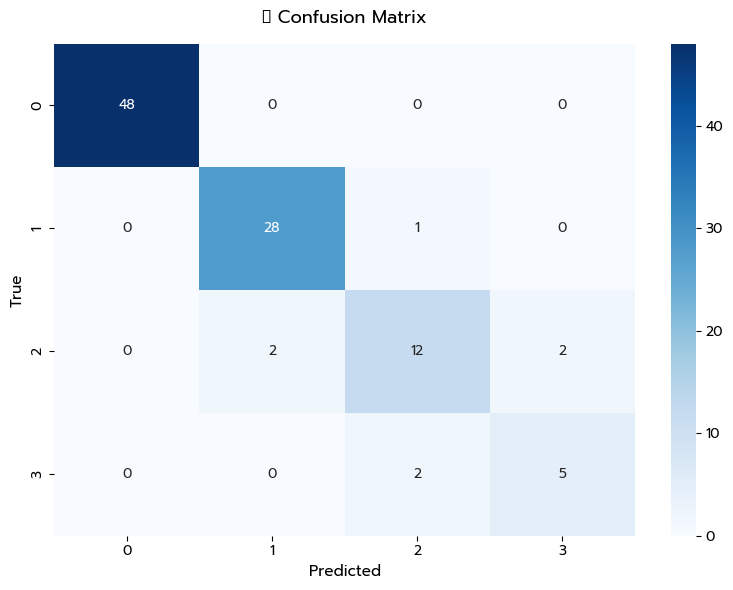

📊 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        48
           1     0.9333    0.9655    0.9492        29
           2     0.8000    0.7500    0.7742        16
           3     0.7143    0.7143    0.7143         7

    accuracy                         0.9300       100
   macro avg     0.8619    0.8575    0.8594       100
weighted avg     0.9287    0.9300    0.9291       100



In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(Ytest, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(Ytest), 
            yticklabels=np.unique(Ytest))
plt.title('🎯 Confusion Matrix', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('True', fontsize=11)
plt.tight_layout()
plt.show()

print("📊 Classification Report:")
print(classification_report(Ytest, predictions, digits=4))

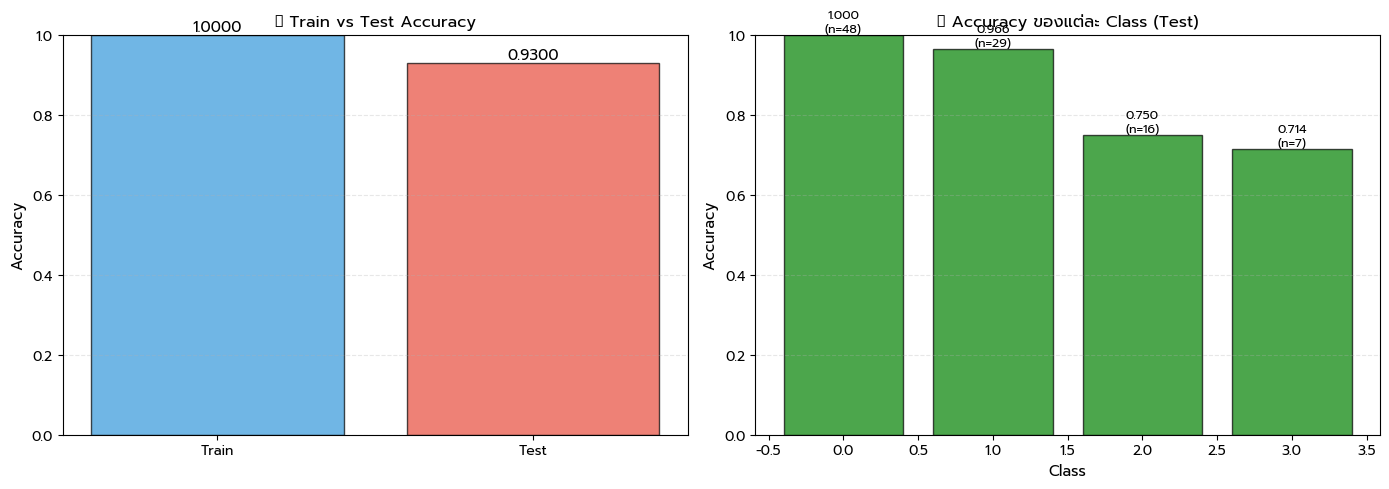

In [9]:
# Compare Train vs Test Accuracy
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Train', 'Test']
colors = ['#3498db', '#e74c3c']

bars = ax[0].bar(labels, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax[0].set_ylabel('Accuracy', fontsize=11)
ax[0].set_title('📊 Train vs Test Accuracy', fontsize=12, fontweight='bold')
ax[0].set_ylim([0, 1])
ax[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}',
               ha='center', va='bottom', fontsize=11, fontweight='bold')

# Class-wise accuracy (Test set)
class_correct = []
class_total = []
for c in np.unique(Ytest):
    mask = (Ytest == c)
    correct = np.sum((predictions == c) & mask)
    total = np.sum(mask)
    class_correct.append(correct / total if total > 0 else 0)
    class_total.append(total)

bars2 = ax[1].bar(np.unique(Ytest), class_correct, color='green', alpha=0.7, edgecolor='black')
ax[1].set_xlabel('Class', fontsize=11)
ax[1].set_ylabel('Accuracy', fontsize=11)
ax[1].set_title('🎯 Accuracy ของแต่ละ Class (Test)', fontsize=12, fontweight='bold')
ax[1].set_ylim([0, 1])
ax[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add values on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}\n(n={class_total[i]})',
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 🔧 Bonus: ทดลองปรับ Hyperparameters

**แนวคิด**: ลองเปลี่ยน architecture และ parameters ต่างๆ

### พารามิเตอร์ที่สำคัญ:

1. **`hidden_layer_sizes`** - จำนวน neurons ใน hidden layers
   - `(20,)` = 1 layer, 20 neurons
   - `(20, 20)` = 2 layers, 20 neurons each
   - `(100, 50, 20)` = 3 layers, deep network

2. **`activation`** - Activation function
   - `'relu'` (default) - fast, standard choice
   - `'tanh'` - works well for some problems
   - `'logistic'` - sigmoid

3. **`alpha`** - L2 regularization (default=0.0001)
   - ยิ่งสูง → ยิ่ง regularize → ป้องกัน overfitting

4. **`learning_rate_init`** - Learning rate (default=0.001)
   - สูง → เรียนรู้เร็ว แต่อาจไม่ converge
   - ต่ำ → เรียนรู้ช้า แต่แม่นยำ

5. **`solver`** - Optimizer
   - `'adam'` (default) - adaptive, ใช้ดี
   - `'sgd'` - stochastic gradient descent
   - `'lbfgs'` - สำหรับ dataset เล็ก

In [10]:
# ทดลอง architectures ต่างๆ
architectures = [
    (10,),           # 1 layer, 10 neurons
    (20,),           # 1 layer, 20 neurons
    (20, 20),        # 2 layers, 20 each (original)
    (50, 50),        # 2 layers, 50 each
    (100, 50, 20),   # 3 layers, deep
]

results = []

print("🔧 ทดลอง Architectures ต่างๆ...\n")

for arch in architectures:
    # สร้างและ train model
    model_test = MLPClassifier(
        hidden_layer_sizes=arch,
        max_iter=2000,
        random_state=42,
        verbose=False
    )
    model_test.fit(Xtrain, Ytrain)
    
    # คำนวณ accuracy
    train_acc = model_test.score(Xtrain, Ytrain)
    test_acc = model_test.score(Xtest, Ytest)
    
    # บันทึกผลลัพธ์
    results.append({
        'architecture': str(arch),
        'train_acc': train_acc,
        'test_acc': test_acc,
        'n_iter': model_test.n_iter_
    })
    
    print(f"Architecture: {str(arch):20s} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | Iterations: {model_test.n_iter_:3d}")

print("\n✅ เสร็จแล้ว!")

🔧 ทดลอง Architectures ต่างๆ...

Architecture: (10,)                | Train: 0.9750 | Test: 0.9500 | Iterations: 1577
Architecture: (10,)                | Train: 0.9750 | Test: 0.9500 | Iterations: 1577
Architecture: (20,)                | Train: 0.9950 | Test: 0.9200 | Iterations: 1122
Architecture: (20,)                | Train: 0.9950 | Test: 0.9200 | Iterations: 1122
Architecture: (20, 20)             | Train: 1.0000 | Test: 0.9300 | Iterations: 643
Architecture: (20, 20)             | Train: 1.0000 | Test: 0.9300 | Iterations: 643
Architecture: (50, 50)             | Train: 1.0000 | Test: 0.9300 | Iterations: 479
Architecture: (50, 50)             | Train: 1.0000 | Test: 0.9300 | Iterations: 479
Architecture: (100, 50, 20)        | Train: 1.0000 | Test: 0.9100 | Iterations: 320

✅ เสร็จแล้ว!
Architecture: (100, 50, 20)        | Train: 1.0000 | Test: 0.9100 | Iterations: 320

✅ เสร็จแล้ว!


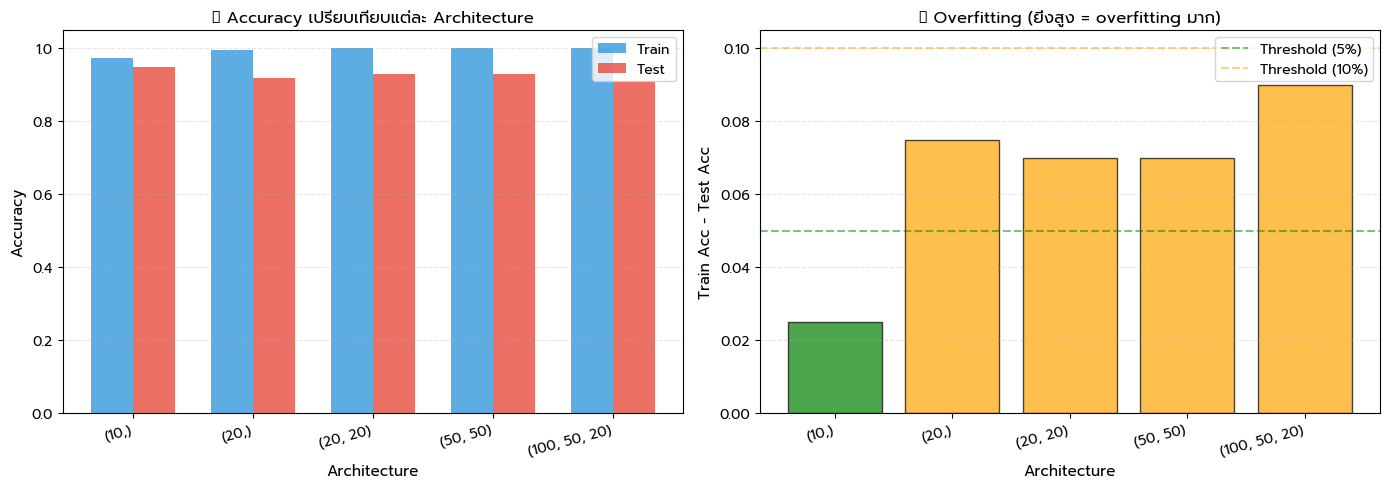

💡 สังเกต:
   • Architecture ที่ดีที่สุด = Test Accuracy สูง + Overfitting ต่ำ
   • Network ใหญ่เกินไป → overfitting (train >> test)
   • Network เล็กเกินไป → underfitting (train, test ต่ำทั้งคู่)


In [11]:
# Plot comparison
import pandas as pd

df_results = pd.DataFrame(results)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Train vs Test Accuracy
x = np.arange(len(df_results))
width = 0.35

ax[0].bar(x - width/2, df_results['train_acc'], width, label='Train', alpha=0.8, color='#3498db')
ax[0].bar(x + width/2, df_results['test_acc'], width, label='Test', alpha=0.8, color='#e74c3c')
ax[0].set_xlabel('Architecture', fontsize=11)
ax[0].set_ylabel('Accuracy', fontsize=11)
ax[0].set_title('📊 Accuracy เปรียบเทียบแต่ละ Architecture', fontsize=12, fontweight='bold')
ax[0].set_xticks(x)
ax[0].set_xticklabels(df_results['architecture'], rotation=15, ha='right')
ax[0].legend()
ax[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Overfitting (Train - Test)
overfitting = df_results['train_acc'] - df_results['test_acc']
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in overfitting]

ax[1].bar(x, overfitting, color=colors, alpha=0.7, edgecolor='black')
ax[1].set_xlabel('Architecture', fontsize=11)
ax[1].set_ylabel('Train Acc - Test Acc', fontsize=11)
ax[1].set_title('🔍 Overfitting (ยิ่งสูง = overfitting มาก)', fontsize=12, fontweight='bold')
ax[1].set_xticks(x)
ax[1].set_xticklabels(df_results['architecture'], rotation=15, ha='right')
ax[1].axhline(y=0.05, color='green', linestyle='--', alpha=0.5, label='Threshold (5%)')
ax[1].axhline(y=0.10, color='orange', linestyle='--', alpha=0.5, label='Threshold (10%)')
ax[1].legend()
ax[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("💡 สังเกต:")
print("   • Architecture ที่ดีที่สุด = Test Accuracy สูง + Overfitting ต่ำ")
print("   • Network ใหญ่เกินไป → overfitting (train >> test)")
print("   • Network เล็กเกินไป → underfitting (train, test ต่ำทั้งคู่)")

## 🎓 สรุปสุดท้าย

### ✨ sklearn MLPClassifier = Neural Network ง่ายๆ ใน 3 บรรทัด!

```python
# 1. สร้าง model
model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=2000)

# 2. Train
model.fit(Xtrain, Ytrain)

# 3. Evaluate
accuracy = model.score(Xtest, Ytest)
```

---

### 🔑 Key Takeaways:

#### 1️⃣ **sklearn ทำให้ง่าย**:
- ❌ ไม่ต้องเขียน forward/backward propagation
- ❌ ไม่ต้อง initialize weights เอง
- ❌ ไม่ต้องเขียน training loop
- ✅ แค่ `.fit()`, `.predict()`, `.score()`

#### 2️⃣ **MLPClassifier Features**:
- **Multi-layer**: รองรับ multiple hidden layers
- **Auto optimization**: ใช้ Adam optimizer (adaptive learning rate)
- **Regularization**: L2 penalty ป้องกัน overfitting
- **Early stopping**: หยุดเมื่อ loss ไม่ลด

#### 3️⃣ **Hyperparameters สำคัญ**:

| Parameter | Purpose | Typical Values |
|-----------|---------|----------------|
| `hidden_layer_sizes` | จำนวน layers + neurons | `(100,)`, `(50, 50)` |
| `activation` | Activation function | `'relu'`, `'tanh'` |
| `alpha` | L2 regularization | `0.0001` - `0.01` |
| `learning_rate_init` | Initial learning rate | `0.001` - `0.01` |
| `max_iter` | Max epochs | `200` - `2000` |

#### 4️⃣ **เมื่อไหร่ใช้ sklearn vs Manual?**

**ใช้ sklearn เมื่อ**:
- 🚀 งาน Production
- 🕐 ต้องการความเร็ว
- 📊 Dataset มาตรฐาน
- 🎯 ต้องการ accuracy ดี

**เขียนเองเมื่อ**:
- 🎓 เรียนรู้หลักการ
- 🔧 ต้องการ custom architecture
- 🧪 Research / Experiment
- 📖 เข้าใจ inner workings

---

### 💡 ข้อควรระวัง:

#### ⚠️ **Overfitting**:
- เกิดเมื่อ: Train Accuracy >> Test Accuracy
- แก้ไข:
  - เพิ่ม `alpha` (L2 regularization)
  - ลด `hidden_layer_sizes`
  - ใช้ early stopping
  - เพิ่มข้อมูล training

#### ⚠️ **Underfitting**:
- เกิดเมื่อ: Train Accuracy, Test Accuracy ต่ำทั้งคู่
- แก้ไข:
  - เพิ่ม `hidden_layer_sizes` (network ใหญ่ขึ้น)
  - เพิ่ม `max_iter` (train นานขึ้น)
  - ลด `alpha` (regularization น้อยลง)

#### ⚠️ **Convergence Issues**:
- เกิดเมื่อ: Warning "ConvergenceWarning"
- แก้ไข:
  - เพิ่ม `max_iter`
  - ปรับ `learning_rate_init`
  - Normalize/standardize features

---

### 🚀 ขั้นตอนต่อไป:

#### 1️⃣ **ลอง Dataset อื่น**:
```python
from sklearn.datasets import load_iris, load_digits, load_wine
X, y = load_digits(return_X_y=True)
# ... split, train, evaluate
```

#### 2️⃣ **Grid Search Hyperparameters**:
```python
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X, y)
```

#### 3️⃣ **Cross-Validation**:
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Average accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
```

#### 4️⃣ **เปรียบเทียบกับ Algorithms อื่น**:
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# เทียบกัน!
```

---

### 📚 เปรียบเทียบกับ Notebooks อื่น:

| Notebook | Focus | Code Length | Level |
|----------|-------|-------------|-------|
| **forwardprop.ipynb** | Forward propagation อย่างเดียว | Long | เข้าใจหลักการ |
| **backprop.ipynb** | Training with gradients | Very Long | เข้าใจลึก |
| **regression.ipynb** | Neural Network Regression | Long | เข้าใจการทำ regression |
| **sklearn_ann.ipynb** (นี่!) | Production-ready NN | **3 lines!** | ใช้งานจริง |

💡 **แนะนำ**: เรียนตามลำดับ forward → backprop → regression → sklearn!

---

## 🎉 สรุปสั้นๆ:

> **"sklearn MLPClassifier = Neural Network สำหรับงานจริง"**

**3 บรรทัดทำ Neural Network**:
1. `model = MLPClassifier(...)` ← สร้าง
2. `model.fit(Xtrain, Ytrain)` ← train
3. `model.score(Xtest, Ytest)` ← evaluate

**ข้อดี**:
- ✅ เขียนง่าย, เร็ว
- ✅ Optimized (C backend)
- ✅ Production-ready
- ✅ มี docs ดี

**ข้อเสีย**:
- ❌ ไม่รู้ inner workings
- ❌ Custom ยาก
- ❌ ไม่เหมาะกับ very deep networks (ใช้ TensorFlow/PyTorch แทน)

---

### 🤔 คำถามท้ายบท:

1. **ทำไมใช้ sklearn ได้แค่ 3 บรรทัด?**
   - sklearn ซ่อน implementation details ไว้ข้างใน
   - ทำให้ใช้งานง่าย แต่ต้องเข้าใจหลักการก่อน

2. **MLPClassifier ต่างจาก Logistic Regression อย่างไร?**
   - Logistic Regression = Linear (ไม่มี hidden layers)
   - MLPClassifier = Non-linear (มี hidden layers + activation)
   - MLP powerful กว่า แต่ช้ากว่า

3. **ควรใช้กี่ hidden layers?**
   - 1 layer: สำหรับ simple problems
   - 2 layers: standard choice
   - 3+ layers: deep learning (ใช้ TensorFlow/PyTorch ดีกว่า)

4. **ทำไมต้อง normalize features?**
   - Features scale ต่างกัน → gradient ไม่สมดุล
   - Normalize แล้ว → training เร็วขึ้น, converge ดีขึ้น

✨ **Happy Learning with sklearn!** ✨